Практическое задание:
- взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
- сделать обзорный анализ выбранного датасета
- сделать feature engineering
- обучить любой классификатор (какой вам нравится)
- разобраться с SHAP и построить важности признаков для:
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для топ 10%
- для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат


### Загружаем данные

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('adult.data', sep=',', index_col=False, names=['age', 'workclass', 'fnlwgt', 'education', 
                                                                  'education-num', 'marital-status', 'occupation', 
                                                                  'relationship', 'race', 'sex', 'capital-gain', 
                                                                  'capital-loss', 'hours-per-week', 'native-country', 'income'])
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Обзор данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


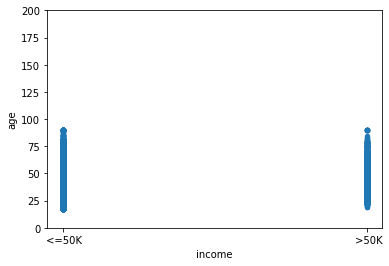

In [11]:
var = 'income'
data = pd.concat([df['age'], df[var]], axis=1)
data.plot.scatter(x=var, y='age', ylim=(0,200));

In [22]:
TARGET_NAME = 'income'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()

In [24]:
BASE_FEATURE_NAMES

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

C:\Users\Rush\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


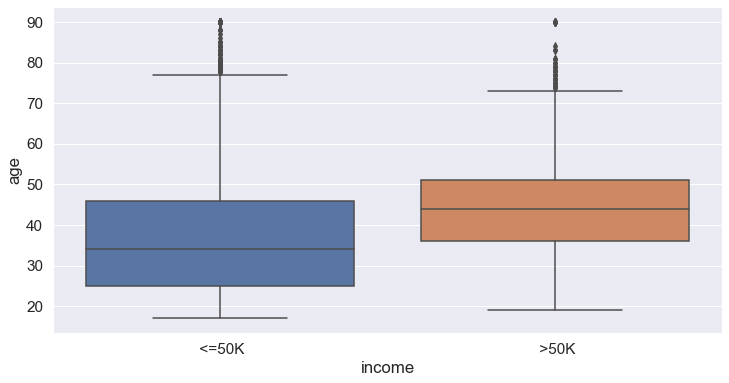

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(df['income'], df['age'])
plt.xlabel('income')
plt.ylabel('age')
# plt.title('Distribution of Price by Rooms')
plt.show();

### Feature engeneering

In [29]:
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})

In [30]:
df['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

x_data = pd.get_dummies(df.iloc[:,:-1])
y_data = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [116]:
x_train['martial']

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
12011,51,169364,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23599,51,254211,14,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23603,21,202373,11,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6163,25,391192,10,0,0,24,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14883,48,193775,13,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,23,149224,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10742,37,231180,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16921,27,140863,5,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25796,46,456062,16,0,2415,55,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Обучение модели

In [32]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

C:\Users\Rush\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    
    f1 = f1_score(y_test, y_predict) * 100

    roc = roc_auc_score(y_test, y_predict) * 100

    rec = recall_score(y_test, y_predict, average='binary') * 100

    prc = precision_score(y_test, y_predict, average='binary') * 100

    return f1, roc, rec, prc

In [36]:
evaluate_results(y_test, y_predict)

(70.90464547677261, 79.60209153416673, 64.9807938540333, 78.01691006917756)

In [34]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [72]:
model = xgb.train({"learning_rate": 0.01}, 
                      xgb.DMatrix(x_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:])

### SHAP для всей выборки

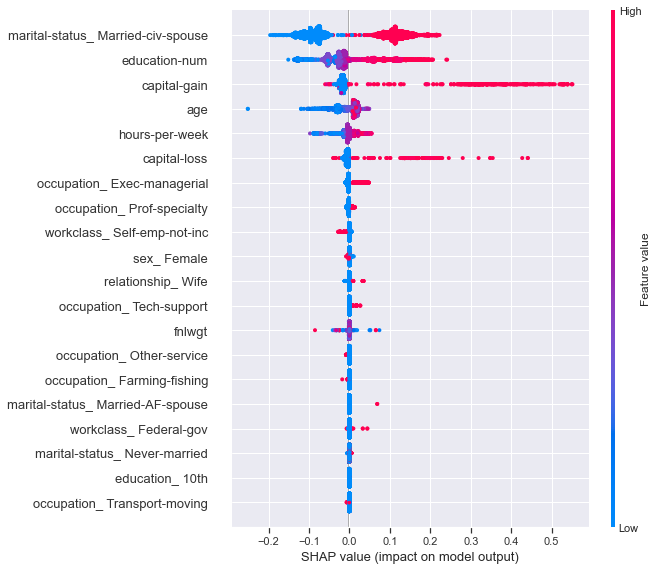

In [53]:
shap.summary_plot(shap_values=shap_values, features=x_test)

### SHAP для топ 10%

In [73]:
preds = model.predict(xgb.DMatrix(x_test))

In [74]:
preds

array([0.20291938, 0.38136822, 0.28557533, ..., 0.18868348, 0.18868348,
       0.44286117], dtype=float32)

In [75]:
x_test['preds'] = preds


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [96]:
x_test_sorted = x_test.sort_values(by='preds', ascending=False)

In [98]:
x_test_sorted.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,preds
28333,61,29059,9,0,2754,25,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.839158
25793,29,77009,7,0,2754,42,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.839158
10616,51,68898,11,0,2444,39,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.839158


In [90]:
x_test_top_ten = x_test_sorted.head(int(x_test.shape[0] * .1)).drop(['preds'], axis = 1)

In [99]:
x_test_top_ten.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
28333,61,29059,9,0,2754,25,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25793,29,77009,7,0,2754,42,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10616,51,68898,11,0,2444,39,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [93]:
shap_values = explainer.shap_values(x_test_top_ten)

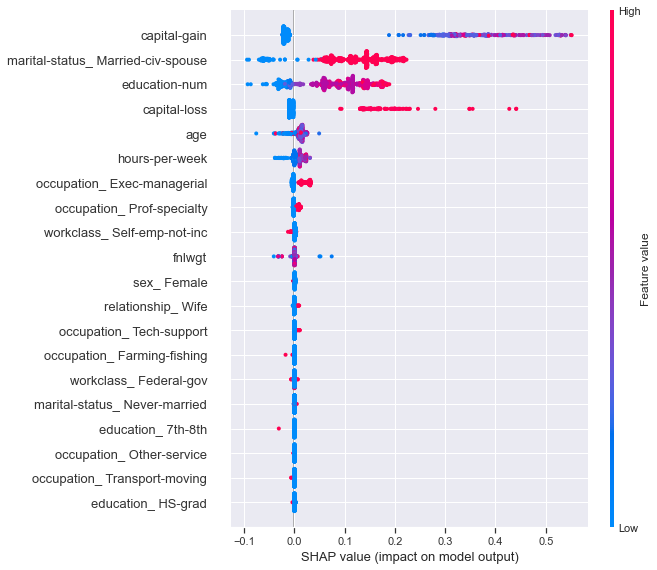

In [94]:
shap.summary_plot(shap_values=shap_values, features=x_test_top_ten)

In [102]:
x_test = x_test.drop(['preds'], axis = 1)

In [119]:
shap.force_plot(explainer.expected_value, shap_values[150,:], x_test_top_ten.iloc[150,:])

Прирост капитала больше всего повышает вероятность того, что человек получает больше 50 тыс в год. Также повышает вероятность нахождение в браке. В то время, как education_num (описания нет, возможно речь о годах обучения) понижает скор.